# Realistic Ocean Climate - Machine Learning

This project aims to introduce the most important steps of data analysis and explore the different stages. We will use the data of realistic ocean climate available on the Kaggle website at the following link: https://www.kaggle.com/datasets/atharvasoundankar/shifting-seas-ocean-climate-and-marine-life-dataset

In [215]:
!ls


Data  Data.zip	realistic_ocean_climate_dataset.csv  sample_data


In [216]:
import shutil
from google.colab import files

shutil.make_archive('Data', 'zip', 'Data')
files.download('Data.zip')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [217]:
import os
os.makedirs('Data', exist_ok=True)
data.to_csv('Data/original_dataset.csv', index=False)

## Importing the Dependencies

In [218]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve



## Reading the data

In [219]:
data = pd.read_csv('realistic_ocean_climate_dataset.csv')

In [220]:
# printing the first 5 rows of the dataset
data.head()

,Date,Location,Latitude,Longitude,SST (آ٠C),pH Level,Bleaching Severity,Species Observed,Marine Heatwave
0,2015-01-01,Red Sea,20.0248,38.4931,29.47,8.107,NaN,106,False
1,2015-01-07,Great Barrier Reef,-18.2988,147.7782,29.65,8.004,High,116,False
2,2015-01-14,Caribbean Sea,14.9768,-75.0233,28.86,7.947,High,90,False
3,2015-01-20,Great Barrier Reef,-18.3152,147.6486,28.97,7.995,Medium,94,False
4,2015-01-27,Galأ!pagos,-0.8805,-90.9769,28.60,7.977,NaN,110,False


In [221]:
# number of rows and Columns in this dataset
data.shape

(500, 9)

## Data Preprocessing

we use data.info() to get a quick summary of a DataFrame.

- Detect missing data.

- Understand data types before doing analysis or modeling.

- Get a quick overview of the dataset’s structure.

In [222]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                500 non-null    object 
 1   Location            500 non-null    object 
 2   Latitude            500 non-null    float64
 3   Longitude           500 non-null    float64
 4   SST (آ٠C)           500 non-null    float64
 5   pH Level            500 non-null    float64
 6   Bleaching Severity  350 non-null    object 
 7   Species Observed    500 non-null    int64  
 8   Marine Heatwave     500 non-null    bool   
dtypes: bool(1), float64(4), int64(1), object(3)
memory usage: 31.9+ KB


In [223]:
# Rename the column 'SST (آ٠C)' to 'SST' to simplify access and remove special characters
data.rename(columns={'SST (آ٠C)': 'SST'}, inplace=True)

In [224]:
# Convert 'Date' column to datetime format and extract new temporal features
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Season'] = data['Month'] % 12 // 3 + 1  # 1: Winter, 2: Spring, 3: Summer, 4: Fall

# Drop the original 'Date' column as it's no longer needed
data.drop(columns=['Date'], inplace=True)

In [225]:
data.head()

,Location,Latitude,Longitude,SST,pH Level,Bleaching Severity,Species Observed,Marine Heatwave,Year,Month,Season
0,Red Sea,20.0248,38.4931,29.47,8.107,NaN,106,False,2015,1,1
1,Great Barrier Reef,-18.2988,147.7782,29.65,8.004,High,116,False,2015,1,1
2,Caribbean Sea,14.9768,-75.0233,28.86,7.947,High,90,False,2015,1,1
3,Great Barrier Reef,-18.3152,147.6486,28.97,7.995,Medium,94,False,2015,1,1
4,Galأ!pagos,-0.8805,-90.9769,28.60,7.977,NaN,110,False,2015,1,1


####Dealing with missing data

In [226]:
# This line of code calculates the total number of missing (null) values in each column of the DataFrame 'data'.
data.isnull().sum()

,0
Location,0
Latitude,0
Longitude,0
SST,0
pH Level,0
Bleaching Severity,150
Species Observed,0
Marine Heatwave,0
Year,0
Month,0


In [227]:
# Converts the 'Bleaching Severity' column to lowercase, removes leading/trailing spaces.
data['Bleaching Severity'] = data['Bleaching Severity'].str.strip().str.lower()

In [228]:
# Replaces the string 'nan' in the 'Bleaching Severity' column with actual missing values (pd.NA).
data['Bleaching Severity'].replace('nan', pd.NA, inplace=True)

<ipython-input-228-a77530588451>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Bleaching Severity'].replace('nan', pd.NA, inplace=True)


In [229]:
# Fills missing values (NaN) in the 'Bleaching Severity' column with the most frequent value (mode) of that column.
data['Bleaching Severity'].fillna(data['Bleaching Severity'].mode()[0], inplace=True)

<ipython-input-229-37e7083ab0c7>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Bleaching Severity'].fillna(data['Bleaching Severity'].mode()[0], inplace=True)


### Encode Categorical Columns

Bleaching Severity, location and Marine Heatwave columns values are text, we can't give this text directly to the machine learning model, so we need to replace this text values to meaningful numerical values.

We will use OneHotEncoding for (location) ، casting Boolean to integer for (Marine Heatwave) and label encoding for (Bleaching Severity).

In [230]:
data.replace({'Bleaching Severity':{'low':0,'medium':1,'high':2}}, inplace=True)

<ipython-input-230-99411cb96bdd>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({'Bleaching Severity':{'low':0,'medium':1,'high':2}}, inplace=True)


In [231]:
# Convert the original 'Marine Heatwave' column (True/False) to integers (1/0)
data['Marine_Heatwave'] = data['Marine Heatwave'].astype(int)

# Drop the original column as it's now redundant
data = data.drop('Marine Heatwave', axis=1)

In [232]:
# Apply One-Hot Encoding to the 'Location' column assuming it exists in the dataframe
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_data = encoder.fit_transform(data[['Location']])

# Convert encoded array to DataFrame with proper column names
encoded_data = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['Location']))

# Concatenate encoded columns back to the original dataframe
data = pd.concat([data, encoded_data], axis=1)

# Drop the original 'Location' column after encoding
data = data.drop('Location', axis=1)

In [233]:
data.head()

,Latitude,Longitude,SST,pH Level,Bleaching Severity,Species Observed,Year,Month,Season,Marine_Heatwave,Location_Caribbean Sea,Location_Galأ!pagos,Location_Great Barrier Reef,Location_Hawaiian Islands,Location_Maldives,Location_Red Sea,Location_South China Sea
0,20.0248,38.4931,29.47,8.107,0,106,2015,1,1,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-18.2988,147.7782,29.65,8.004,2,116,2015,1,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,14.9768,-75.0233,28.86,7.947,2,90,2015,1,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-18.3152,147.6486,28.97,7.995,1,94,2015,1,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,-0.8805,-90.9769,28.60,7.977,0,110,2015,1,1,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


## Exploratory Data Analysis (EDA)

Goal: To understand the nature of the data, distributions, relationships, and identify any anomalies or important factors to watch out for before building the model.

### Quick overview


In [234]:
print(data.info())  # Display summary of the DataFrame including data types and non-null counts
print(data.describe())  # Show statistical summary (mean, std, min, max, etc.) for numerical columns
print(data['Marine_Heatwave'].value_counts())  # Count the occurrences of each class in the target variable

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Latitude                     500 non-null    float64
 1   Longitude                    500 non-null    float64
 2   SST                          500 non-null    float64
 3   pH Level                     500 non-null    float64
 4   Bleaching Severity           500 non-null    int64  
 5   Species Observed             500 non-null    int64  
 6   Year                         500 non-null    int32  
 7   Month                        500 non-null    int32  
 8   Season                       500 non-null    int32  
 9   Marine_Heatwave              500 non-null    int64  
 10  Location_Caribbean Sea       500 non-null    float64
 11  Location_Galأ!pagos          500 non-null    float64
 12  Location_Great Barrier Reef  500 non-null    float64
 13  Location_Hawaiian Is

### Histograms + KDE for numerical features


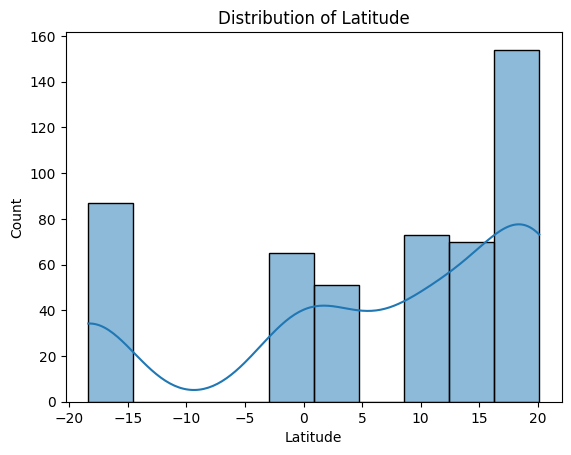

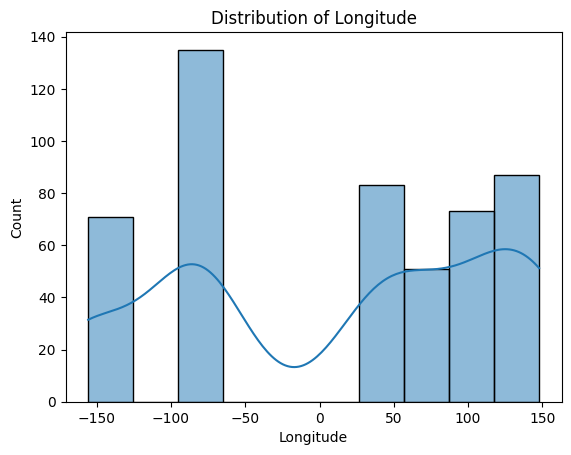

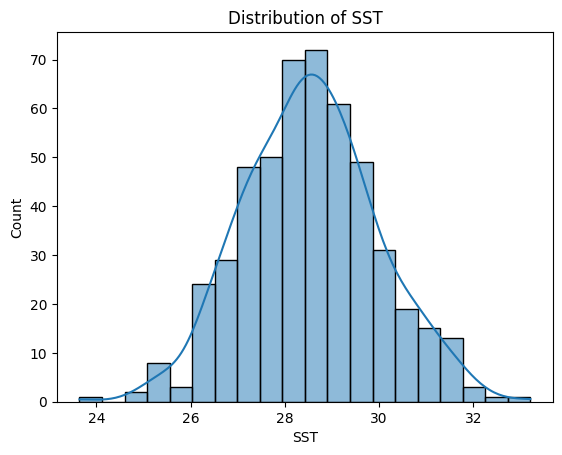

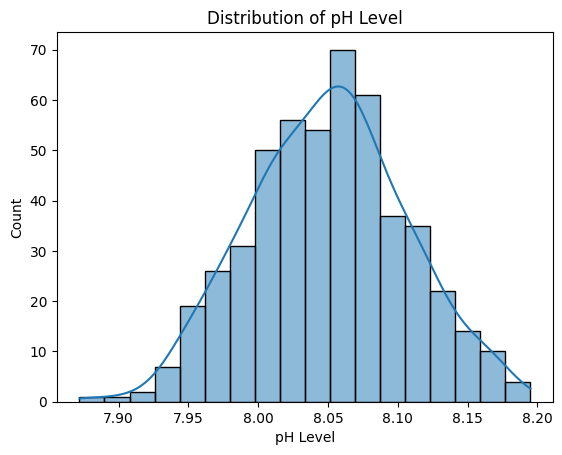

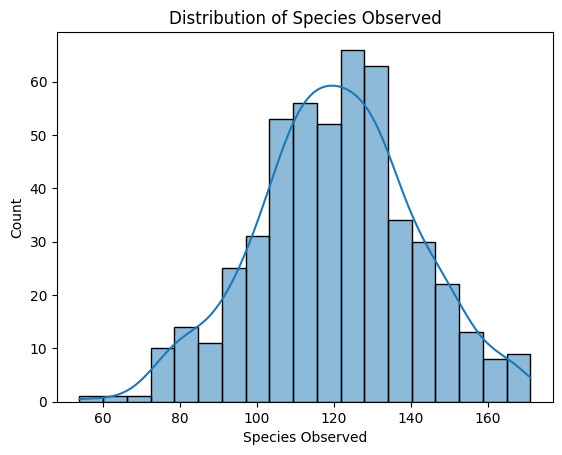

In [235]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_cols = ['Latitude', 'Longitude', 'SST', 'pH Level', 'Species Observed']

for col in numerical_cols:
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

In [236]:
print(data[col].skew())

-0.06191463609887063


### Boxplot with categories

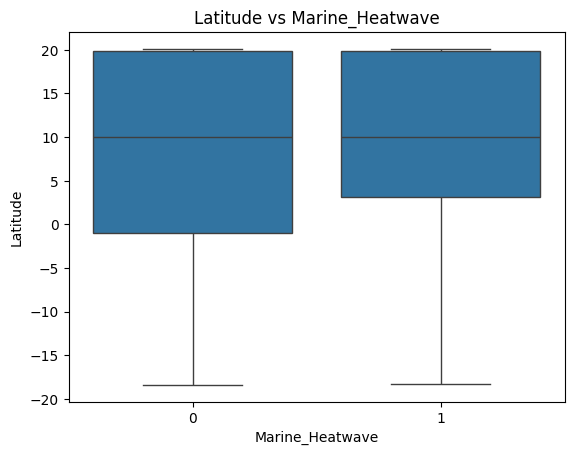

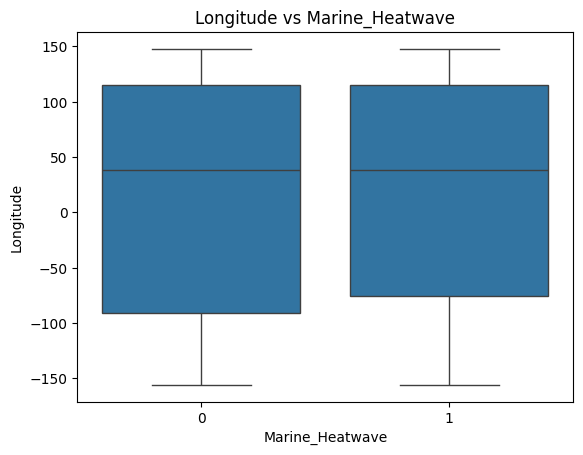

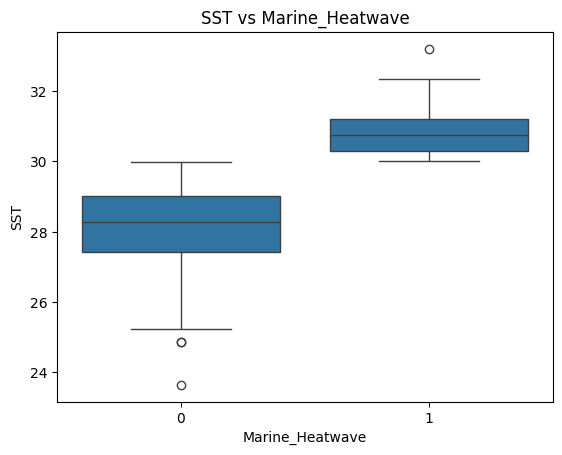

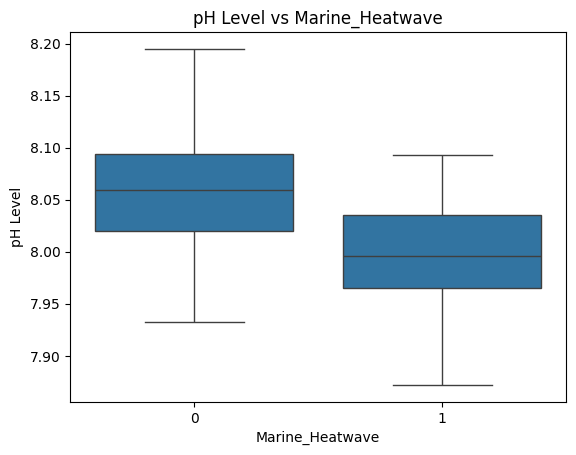

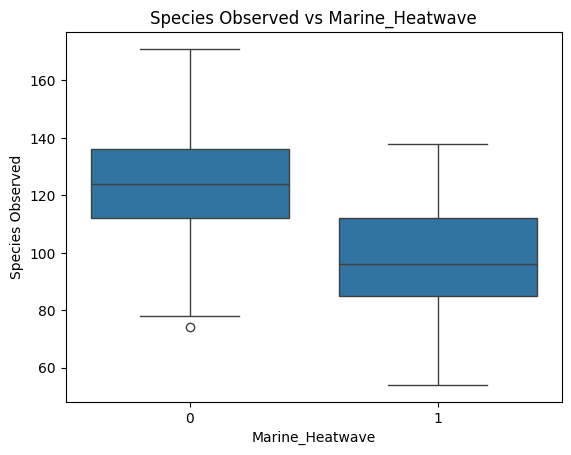

In [237]:
for col in numerical_cols:
    sns.boxplot(x='Marine_Heatwave', y=col, data=data)
    plt.title(f'{col} vs Marine_Heatwave')
    plt.show()

* **Sea Surface Temperature (SST)** is the strongest indicator of the presence of a marine heatwave among the numerical variables plotted.
* **Latitude and longitude** do not provide a clear distinction regarding the presence of a marine heatwave in this dataset.
* **pH level** shows a slight variation with heatwaves, possibly indicating an effect or being affected by them.


### Heatmap (Correlation Matrix)

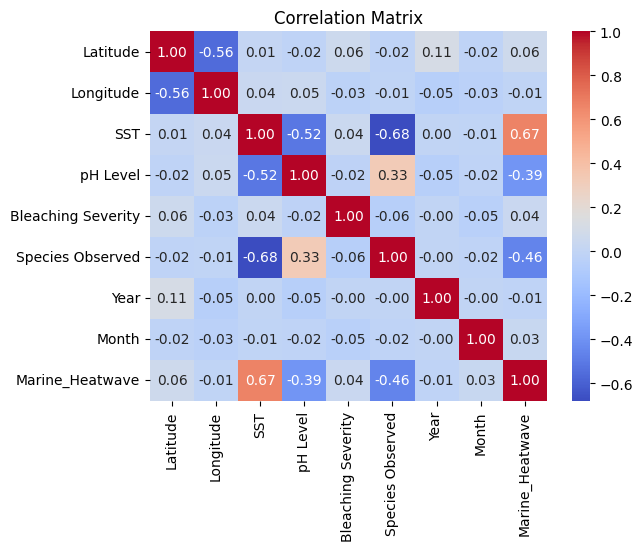

<Figure size 2000x2000 with 0 Axes>

In [238]:
# Corrected column name in the list
num_cols = ['Latitude','Longitude','SST','pH Level','Bleaching Severity','Species Observed','Year','Month','Marine_Heatwave']

# Recalculate the correlation matrix
correlation = data[num_cols].corr()

# Plot the heatmap
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')

# Create the figure *before* showing it, as plt.show() clears the figure
plt.figure(figsize=(20, 20)) # The figure size should be set before creating the plot

plt.show()

• SST and Marine_Heatwave = 0.67
A strong positive correlation. This means higher sea surface temperatures are associated with the occurrence of marine heatwaves. This is logical and scientifically sound.

 • pH Level and Marine_Heatwave = -0.39
A moderate negative correlation. As marine heatwaves increase, the pH level tends to decrease (the ocean becomes slightly more acidic).

 • Species Observed and Marine_Heatwave = -0.46
A moderate negative correlation. Marine heatwaves negatively affect the number of observed species (species count decreases).

 • Latitude and Longitude = -0.56
A moderate negative correlation between latitude and longitude in your data, possibly due to the geographic distribution.

 • SST and pH Level = -0.52
A fairly strong negative correlation between sea surface temperature and pH level. Higher temperatures are associated with lower pH (more acidic).

### Pairplot

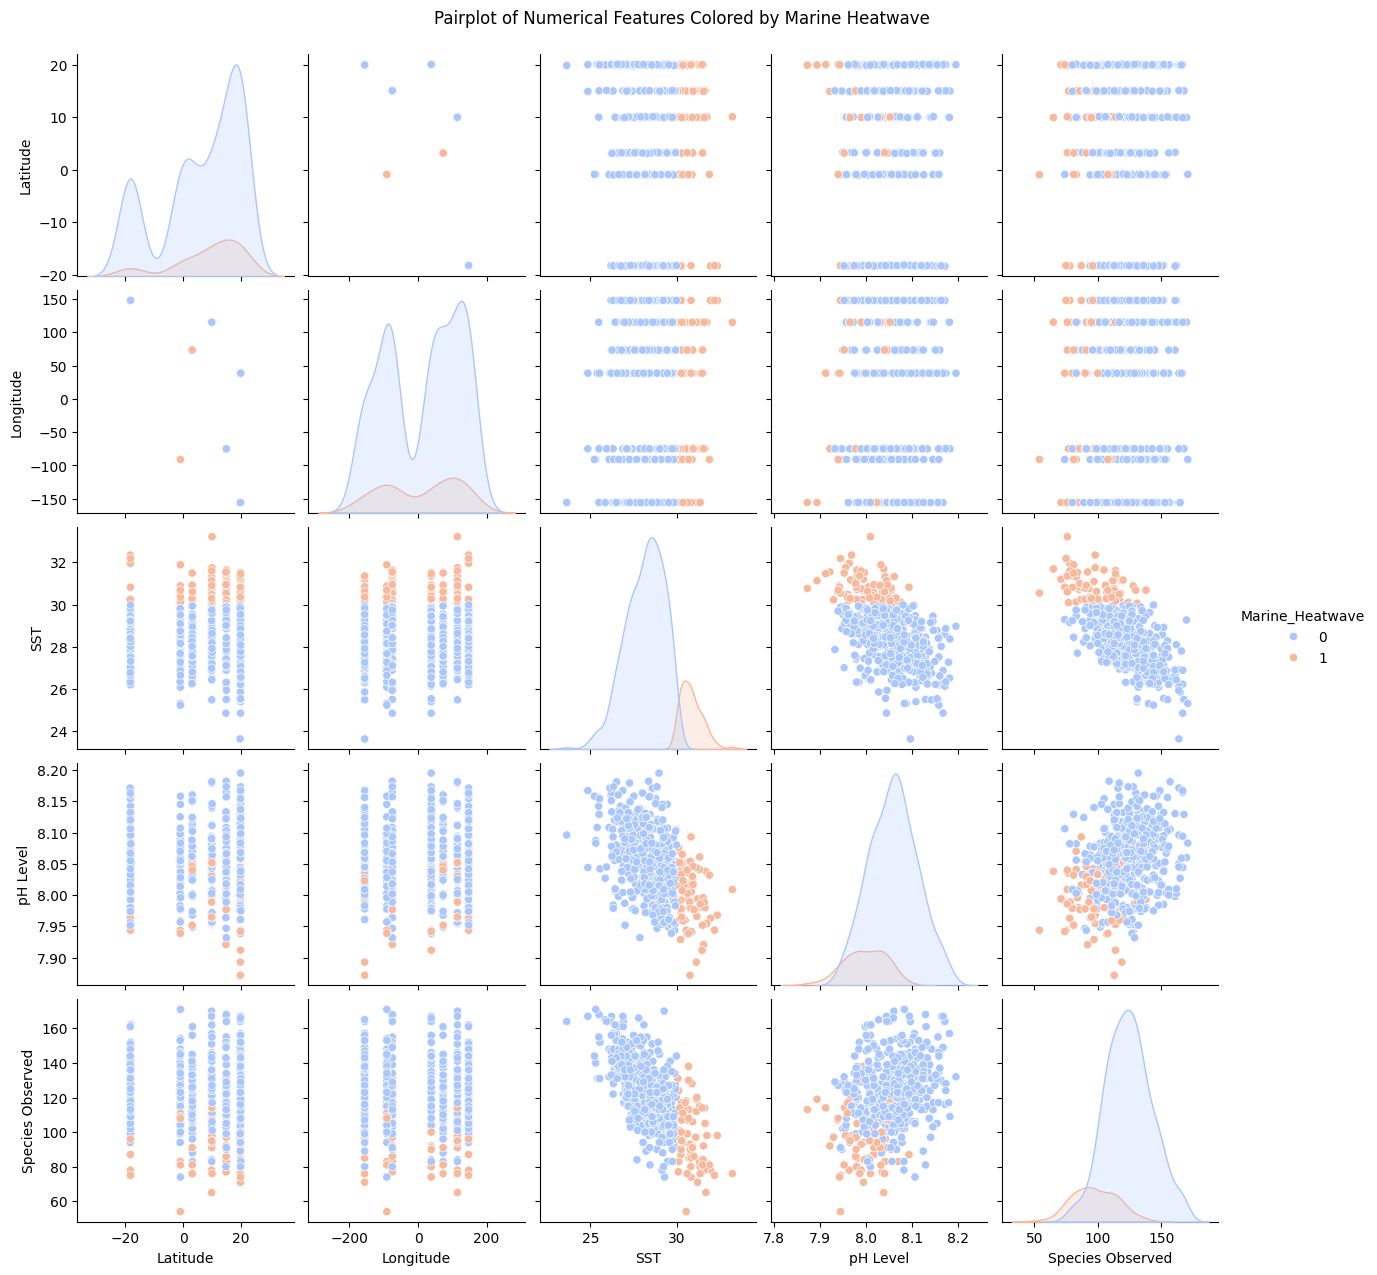

In [239]:
# Pairplot: Visualize relationships between numerical features,
# colored by the target variable 'Marine_Heatwave' for clear class separation.
sns.pairplot(data, vars=['Latitude', 'Longitude', 'SST', 'pH Level', 'Species Observed'],
             hue='Marine_Heatwave', palette='coolwarm', diag_kind='kde')
plt.suptitle('Pairplot of Numerical Features Colored by Marine Heatwave', y=1.02)
plt.show()


### Violin Plot

<ipython-input-240-66d96d95c771>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Marine_Heatwave', y=col, data=data, palette='muted')


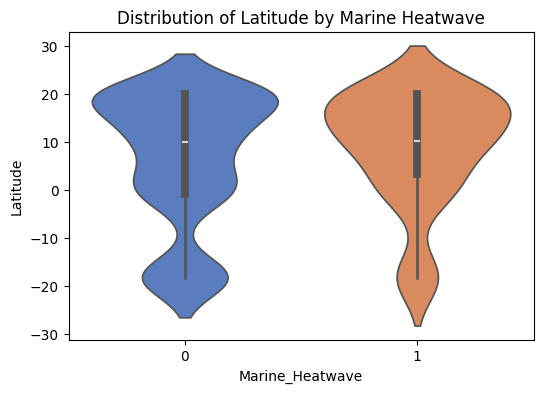

<ipython-input-240-66d96d95c771>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Marine_Heatwave', y=col, data=data, palette='muted')


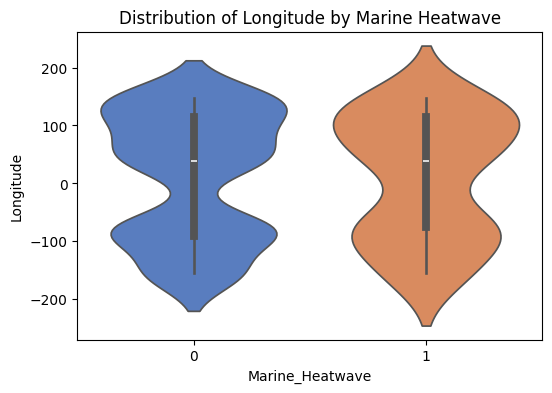

<ipython-input-240-66d96d95c771>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Marine_Heatwave', y=col, data=data, palette='muted')


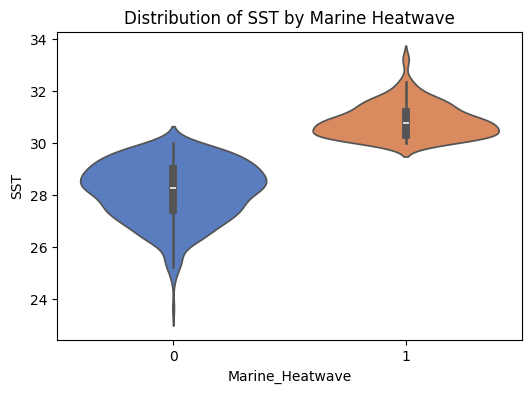

<ipython-input-240-66d96d95c771>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Marine_Heatwave', y=col, data=data, palette='muted')


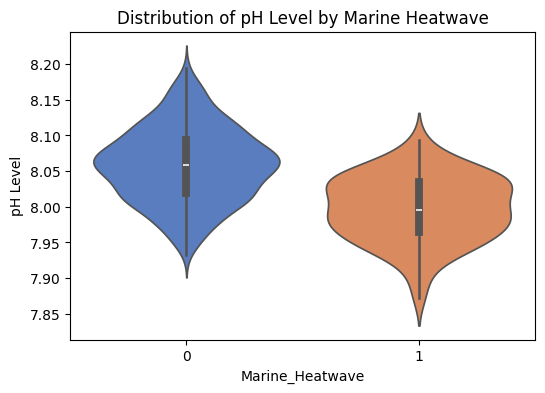

<ipython-input-240-66d96d95c771>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Marine_Heatwave', y=col, data=data, palette='muted')


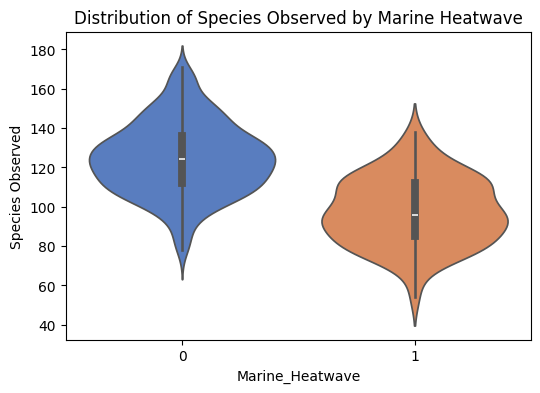

In [240]:
# Violin Plot: Display the distribution and density of each numerical feature,
# split by the target 'Marine_Heatwave' to observe differences in distributions.
numerical_cols = ['Latitude', 'Longitude', 'SST', 'pH Level', 'Species Observed']
for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.violinplot(x='Marine_Heatwave', y=col, data=data, palette='muted')
    plt.title(f'Distribution of {col} by Marine Heatwave')
    plt.show()


### Countplot

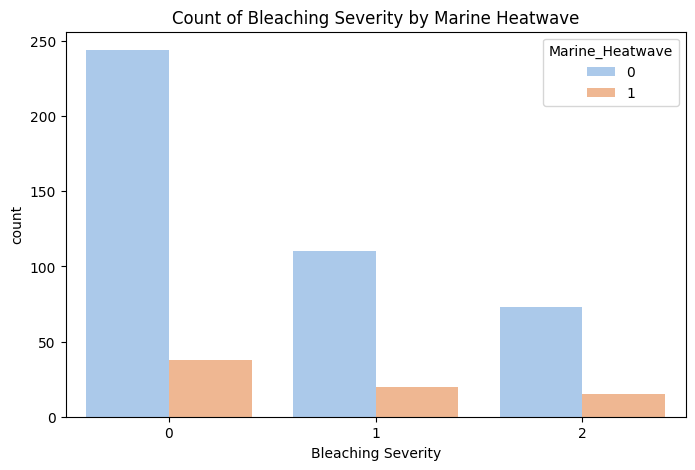

In [241]:
# Countplot: Show counts of categories in 'Bleaching Severity',
# with breakdown by 'Marine_Heatwave' to identify class imbalance or trends.
if 'Bleaching Severity' in data.columns:
    plt.figure(figsize=(8,5))
    sns.countplot(x='Bleaching Severity', hue='Marine_Heatwave', data=data, palette='pastel')
    plt.title('Count of Bleaching Severity by Marine Heatwave')
    plt.show()


### Boxplot for each numeric column

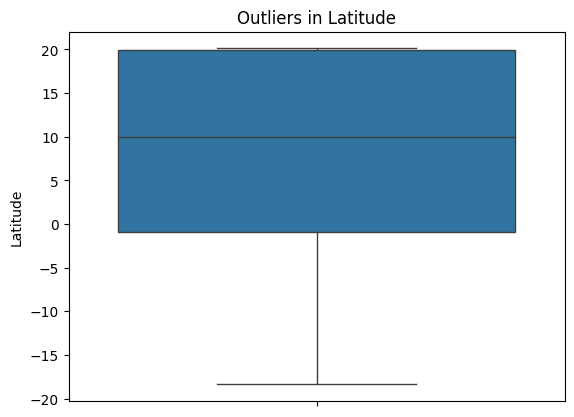

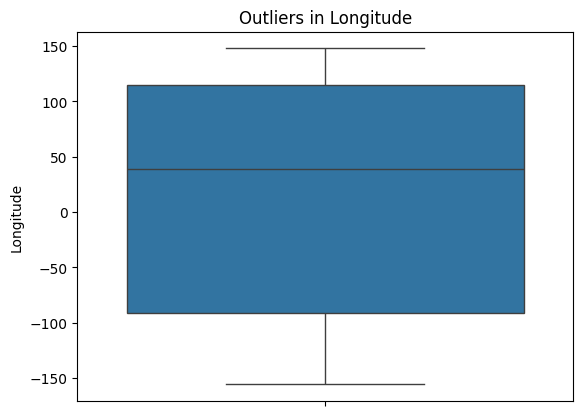

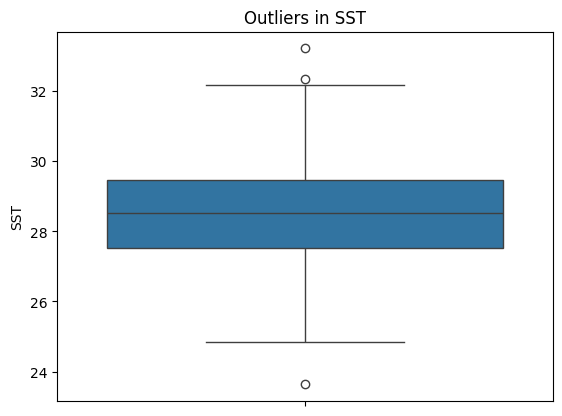

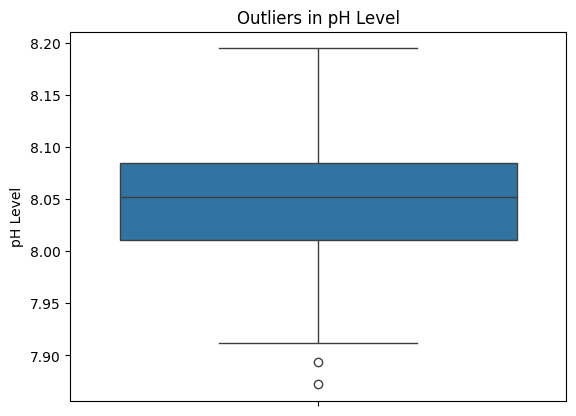

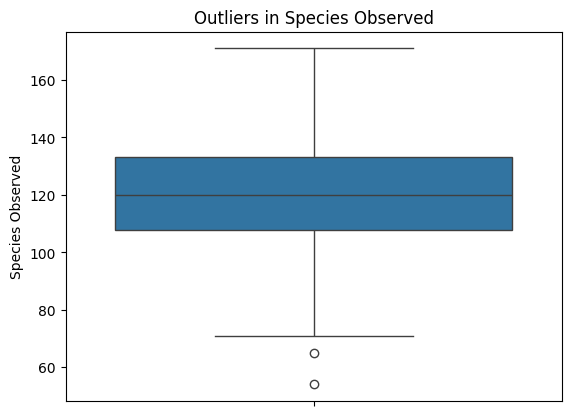

In [242]:
for col in numerical_cols:
    sns.boxplot(data[col])
    plt.title(f'Outliers in {col}')
    plt.show()

• Outliers in Latitude
Most values are within the normal range, but there is one or two very low values (below the box and whiskers), which are outliers.

 • Outliers in Longitude
Same situation, most values are within the range, but there is one outlier on the lower end.

 • Outliers in SST (Sea Surface Temperature)
Some values are outside the normal range (small circles above the upper whisker), representing high outliers, and one low outlier.

 • Outliers in pH Level
There are 2 or 3 values lower than usual, considered outliers.

 • Outliers in Species Observed
Several low outlier points appear far from the rest of the data.

## Capping

Why we used clipping?

We reduce the impact of extreme outliers on sensitive models (like KNN and Logistic Regression).
We avoid losing data by capping rather than removing.
We preserve the original distribution as much as possible.

In [243]:
def cap_outliers(data, columns):
    for col in columns:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)

        # Calculate Interquartile Range (IQR)
        IQR = Q3 - Q1

        # Define the lower and upper bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Clip the values outside the bounds (i.e., cap the outliers)
        data[col] = data[col].clip(lower_bound, upper_bound)

    return data

# List of numerical columns to cap outliers for
cols_with_outliers = ['Latitude', 'Longitude', 'SST', 'pH Level', 'Species Observed']

# Apply the outlier capping function
# Changed 'df' to 'data' to match the DataFrame variable name
data = cap_outliers(data, cols_with_outliers)


## Normalization

In [244]:
# Define the numerical features to normalize
features_to_normalize = ['Latitude', 'Longitude', 'SST', 'pH Level', 'Species Observed']

# Initialize the MinMaxScaler (scales values to range 0–1)
scaler = MinMaxScaler()

# Fit and transform the features
data[features_to_normalize] = scaler.fit_transform(data[features_to_normalize])


## Train/Test split

In [245]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target variable (y)
X = data.drop('Marine_Heatwave', axis=1)
y = data['Marine_Heatwave']

# Split the data into training (80%) and testing (20%) sets with stratification to keep class balance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [246]:
os.makedirs('Data/Train_Test_Split', exist_ok=True)

# Training data
X_train.to_csv('Data/Train_Test_Split/X_train.csv', index=False)
y_train.to_csv('Data/Train_Test_Split/y_train.csv', index=False)

# Test data
X_test.to_csv('Data/Train_Test_Split/X_test.csv', index=False)
y_test.to_csv('Data/Train_Test_Split/y_test.csv', index=False)


## Building and Testing Models


In [247]:
models = {
    'KNN': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42)
}

results = {}

# Train each model, make predictions, and calculate performance metrics
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1] if hasattr(model, "predict_proba") else None

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba) if y_proba is not None else None

    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC': roc_auc
    }


### Printing Results


In [248]:
for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    for metric_name, value in metrics.items():
        if value is not None:
            print(f"  {metric_name}: {value:.4f}")
    print("-" * 30)

Model: KNN
  Accuracy: 0.8600
  Precision: 1.0000
  Recall: 0.0667
  F1 Score: 0.1250
  ROC AUC: 0.6227
------------------------------
Model: Logistic Regression
  Accuracy: 0.8700
  Precision: 0.7500
  Recall: 0.2000
  F1 Score: 0.3158
  ROC AUC: 0.9773
------------------------------
Model: Naive Bayes
  Accuracy: 0.9500
  Precision: 0.9167
  Recall: 0.7333
  F1 Score: 0.8148
  ROC AUC: 0.9835
------------------------------
Model: Decision Tree
  Accuracy: 1.0000
  Precision: 1.0000
  Recall: 1.0000
  F1 Score: 1.0000
  ROC AUC: 1.0000
------------------------------
Model: Random Forest
  Accuracy: 1.0000
  Precision: 1.0000
  Recall: 1.0000
  F1 Score: 1.0000
  ROC AUC: 1.0000
------------------------------


In [249]:

# Assuming you have predictions already for each model:
# Replace these with your real predictions

# Make sure the 'Data/Result' directory exists
import os
if not os.path.exists('Data/Result'):
    os.makedirs('Data/Result')

# Access the trained models from the 'models' dictionary
knn_model = models['KNN']
logistic_model = models['Logistic Regression']
nb_model = models['Naive Bayes']
dt_model = models['Decision Tree']
rf_model = models['Random Forest']


knn_preds = knn_model.predict(X_test)
logistic_preds = logistic_model.predict(X_test)
nb_preds = nb_model.predict(X_test)
dt_preds = dt_model.predict(X_test)
rf_preds = rf_model.predict(X_test)

# Save them


pd.DataFrame(knn_preds, columns=['KNN Prediction']).to_csv('Data/Result/knn_predictions.csv', index=False)
pd.DataFrame(logistic_preds, columns=['Logistic Prediction']).to_csv('Data/Result/logistic_predictions.csv', index=False)
pd.DataFrame(nb_preds, columns=['NaiveBayes Prediction']).to_csv('Data/Result/naivebayes_predictions.csv', index=False)
pd.DataFrame(dt_preds, columns=['DecisionTree Prediction']).to_csv('Data/Result/decisiontree_predictions.csv', index=False)
pd.DataFrame(rf_preds, columns=['RandomForest Prediction']).to_csv('Data/Result/randomforest_predictions.csv', index=False)



##  Models Comparison


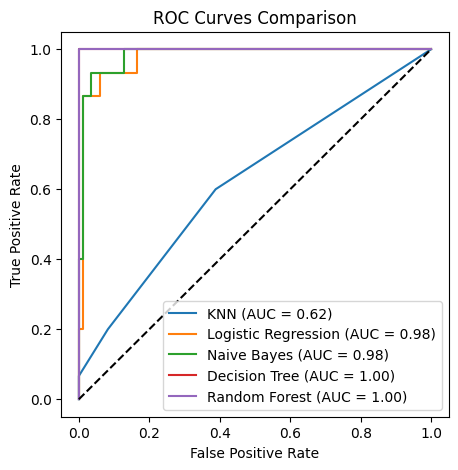

In [250]:
plt.figure(figsize=(5,5))

for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:,1]
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc_score(y_test, y_proba):.2f})')

plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison')
plt.legend()
plt.show()


                 Model  Accuracy  Precision  Recall  F1 Score  ROC AUC
0                  KNN      0.86     1.0000  0.0667    0.1250   0.6227
1  Logistic Regression      0.87     0.7500  0.2000    0.3158   0.9773
2          Naive Bayes      0.95     0.9167  0.7333    0.8148   0.9835
3        Decision Tree      1.00     1.0000  1.0000    1.0000   1.0000
4        Random Forest      1.00     1.0000  1.0000    1.0000   1.0000


<ipython-input-251-2ec073d9633c>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=data_results, palette='Blues_d')


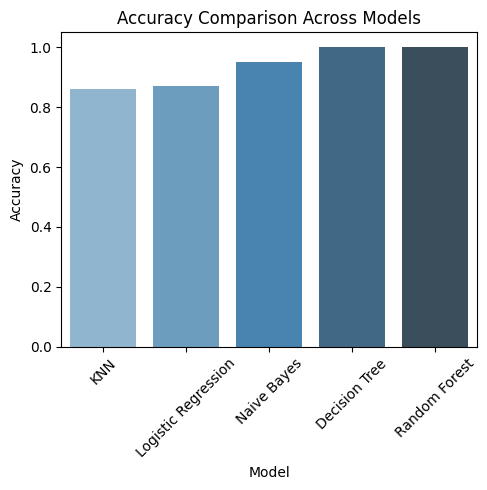

In [251]:
results = {
    'Model': ['KNN', 'Logistic Regression', 'Naive Bayes', 'Decision Tree', 'Random Forest'],
    'Accuracy': [0.8600, 0.8700, 0.9500, 1.0000, 1.0000],
    'Precision': [1.0000, 0.7500, 0.9167, 1.0000, 1.0000],
    'Recall': [0.0667, 0.2000, 0.7333, 1.0000, 1.0000],
    'F1 Score': [0.1250, 0.3158, 0.8148, 1.0000, 1.0000],
    'ROC AUC': [0.6227, 0.9773, 0.9835, 1.0000, 1.0000]
}

# Create a DataFrame
data_results = pd.DataFrame(results)

# Display the table
print(data_results)

# Plot accuracy comparison
plt.figure(figsize=(5,5))
sns.barplot(x='Model', y='Accuracy', data=data_results, palette='Blues_d')
plt.title('Accuracy Comparison Across Models')
plt.ylim(0, 1.05)
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
